#Título e Introdução

# Análise de Dados do Dataset "Wine Quality"

## Introdução
O projeto tem como objetivo explorar e compreender o conjunto de dados "Wine Quality", disponível no repositório da UCI Machine Learning Repository. Este dataset contém informações sobre propriedades físico-químicas e a qualidade de diferentes amostras de vinhos tintos e brancos.

## Contexto do Problema
A indústria vinícola enfrenta constantes desafios para garantir e melhorar a qualidade de seus produtos. Identificar os fatores que mais influenciam na percepção de qualidade é essencial para otimizar processos de produção, reduzir custos e garantir a satisfação dos consumidores.

Este estudo busca responder às seguintes perguntas:
- Quais características químicas e sensoriais têm maior impacto na qualidade do vinho?
- É possível criar um modelo para prever a qualidade com base nas variáveis disponíveis?
- Como os dados podem orientar decisões estratégicas no processo produtivo?

## Objetivos do Projeto
1. **Análise do Problema:** Entender o contexto do negócio e identificar os fatores que impactam na qualidade do vinho.
2. **Exploração de Dados:** Realizar uma análise exploratória (EDA) para identificar padrões e relações entre variáveis.
3. **Redução de Dimensionalidade:** Aplicar a técnica de Análise de Componentes Principais (PCA) para priorizar variáveis mais relevantes.
4. **Insights Estratégicos:** Gerar um dataset final filtrado e apresentar conclusões que possam ser aplicadas ao processo produtivo.

Este estudo combina técnicas de análise de dados e machine learning para fornecer insights acionáveis ao problema.

---


#Configuração inicial:

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
plt.rcParams["figure.figsize"] = (10, 6)

In [77]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [7]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

#Data Wrangling:

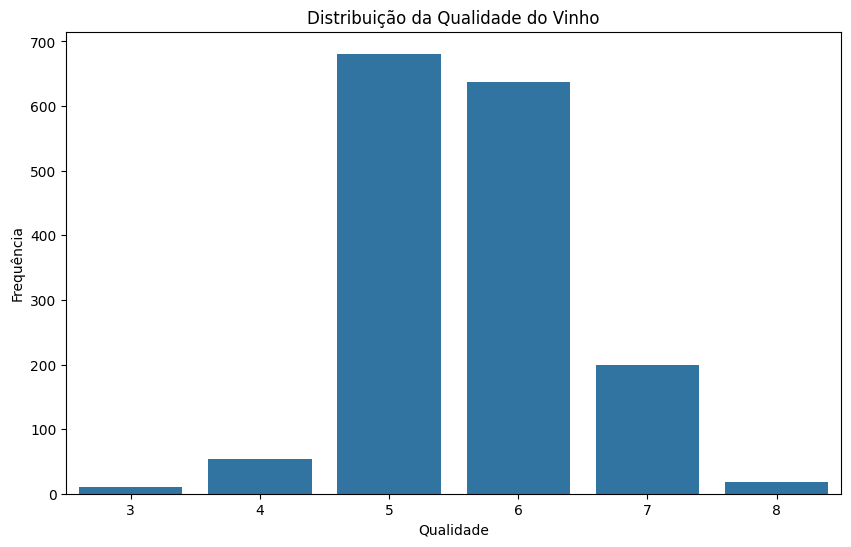

In [78]:
sns.countplot(x='quality', data=data)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.show()

In [79]:
from imblearn.over_sampling import SMOTE

x = data.drop(['quality'],axis=1)
y=data['quality']

smote = SMOTE(random_state=42)

x_sampled , y_sampled = smote.fit_resample(x,y)
data_sampled = pd.DataFrame(x_sampled, columns=x.columns)
data = pd.concat([data_sampled,y_sampled],axis=1)

In [80]:
print("Valores nulos por coluna:")
print(data.isnull().sum())

Valores nulos por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [81]:
print("\nNúmero de linhas duplicadas:")
print(data.duplicated().sum())


Número de linhas duplicadas:
296


In [82]:
data = data.drop_duplicates()

In [83]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3790.000000       3790.000000  3790.000000     3790.000000   
mean        8.360949          0.593142     0.273071        2.595021   
std         1.617065          0.255107     0.203781        1.152422   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.200000          0.390000     0.071074        1.962754   
50%         8.013092          0.550000     0.270000        2.214086   
75%         9.400000          0.736584     0.440000        2.787483   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3790.000000          3790.000000           3790.000000  3790.000000   
mean      0.089645            13.117462             36.042797     0.996518   
std       0.045550             9.605386             28.479678     0.001855   
min       0.012000             1.000000         

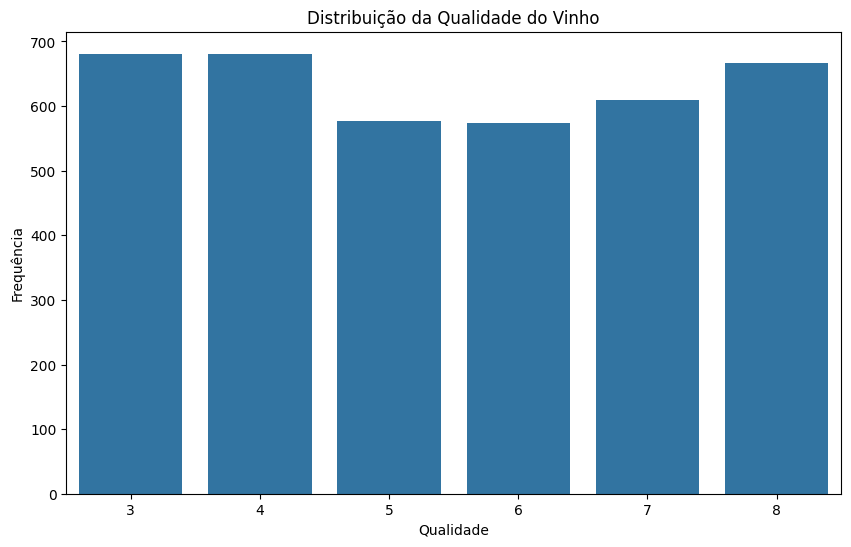

In [84]:
sns.countplot(x='quality', data=data)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.show()

In [85]:
print(data.shape)

(3790, 12)


In [86]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


# Análise Exploratória de Dados

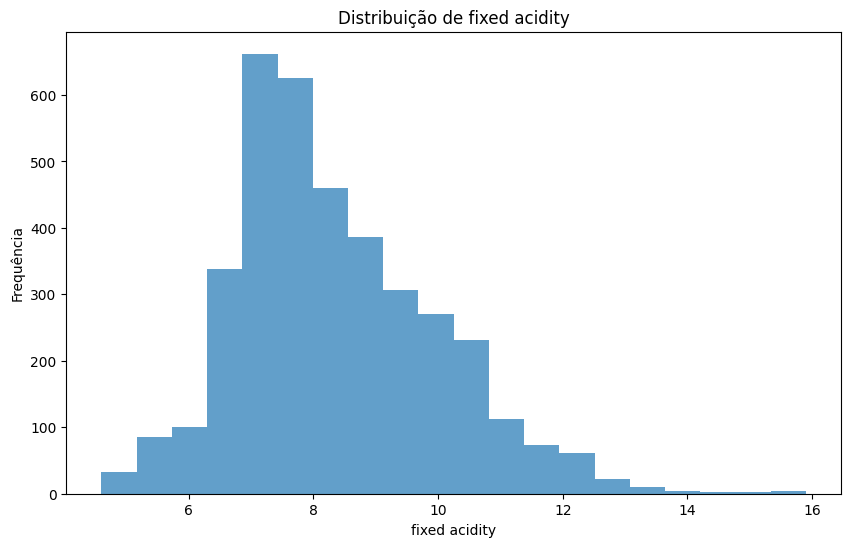

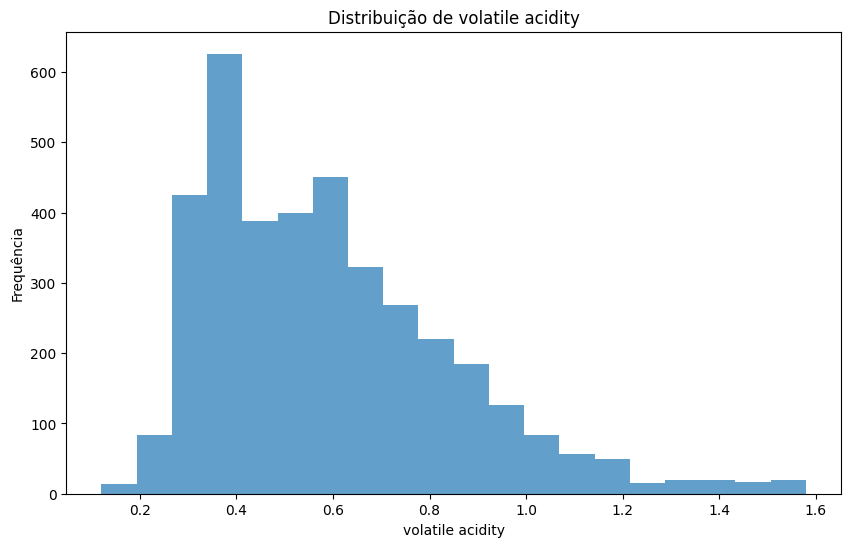

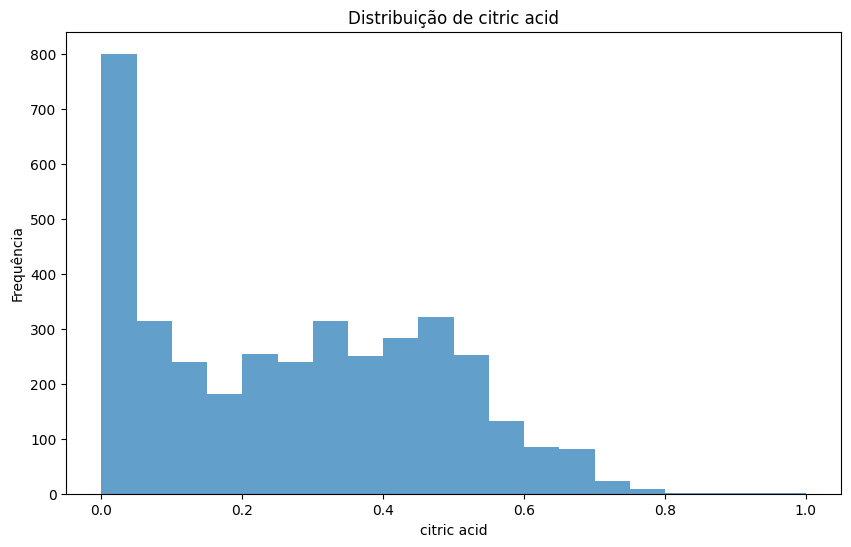

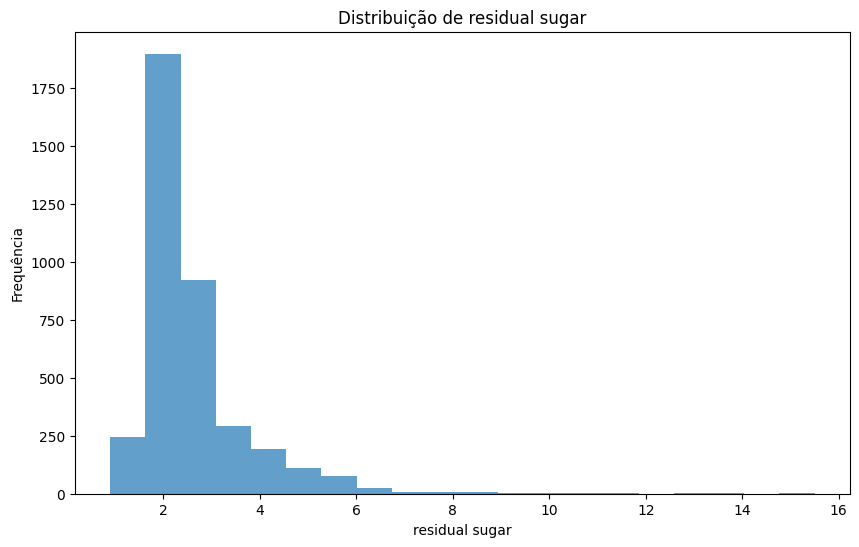

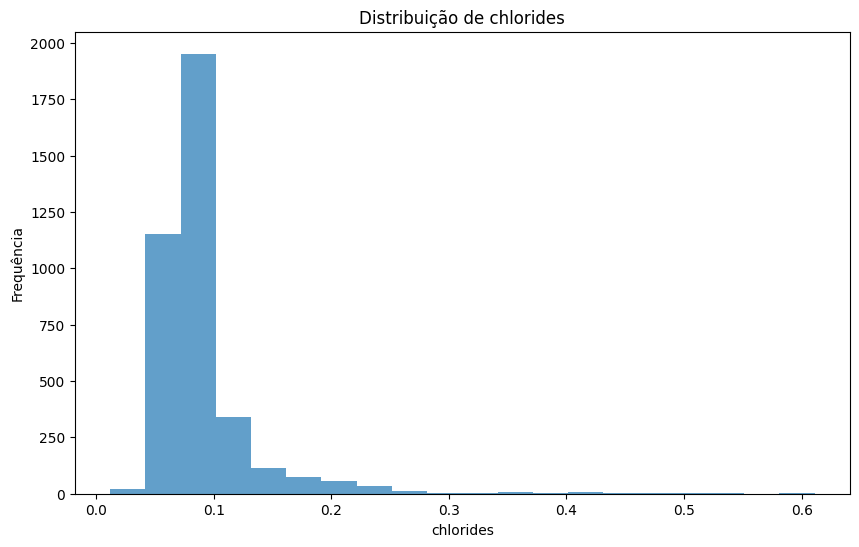

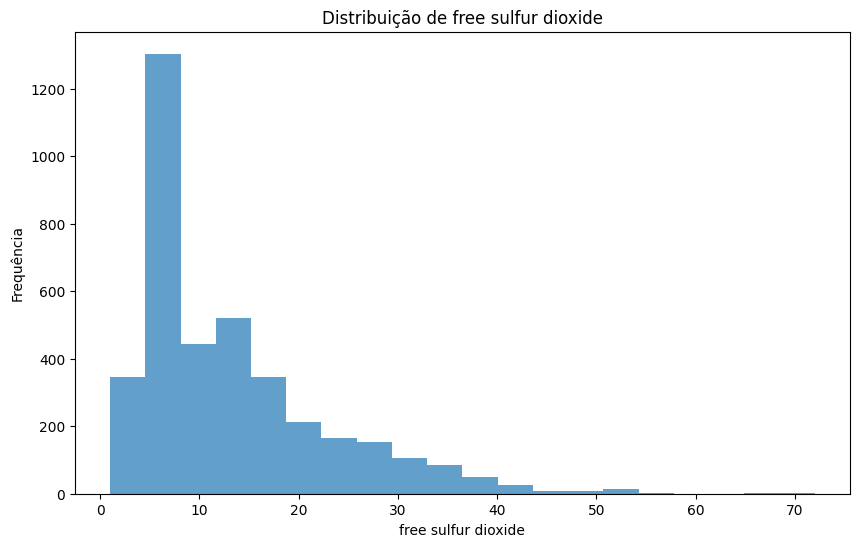

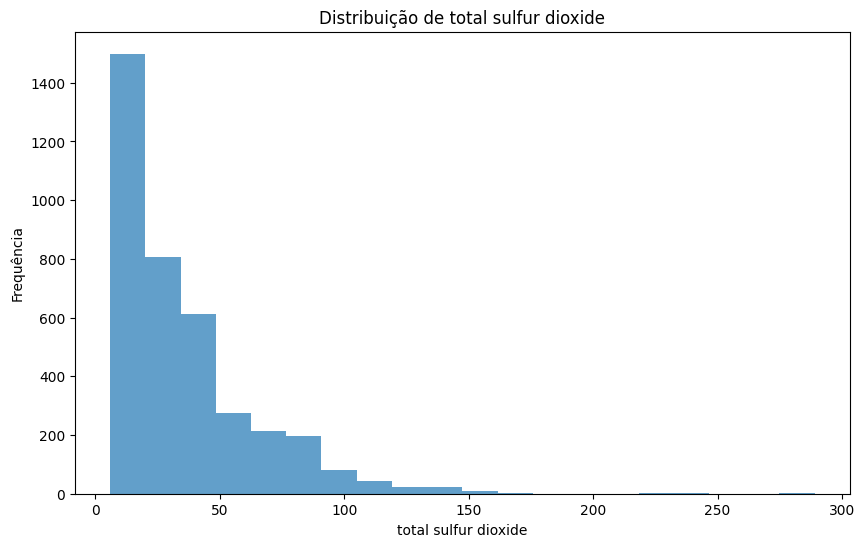

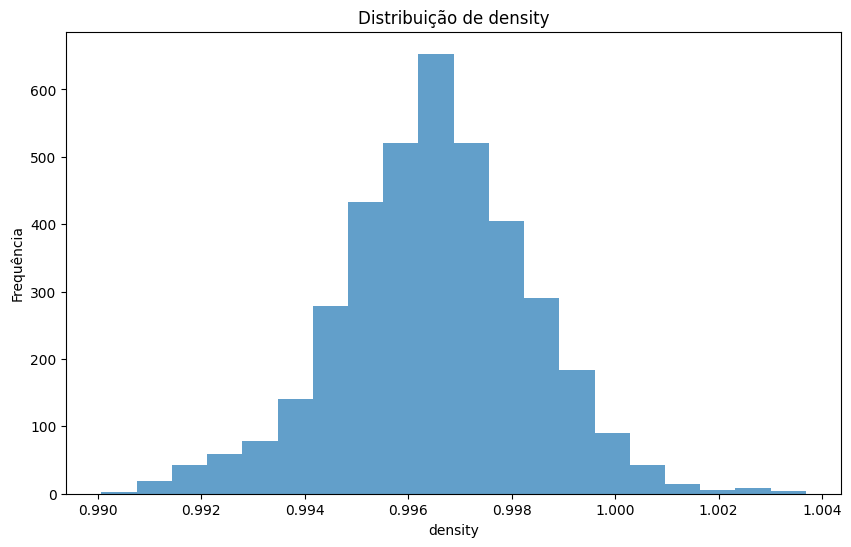

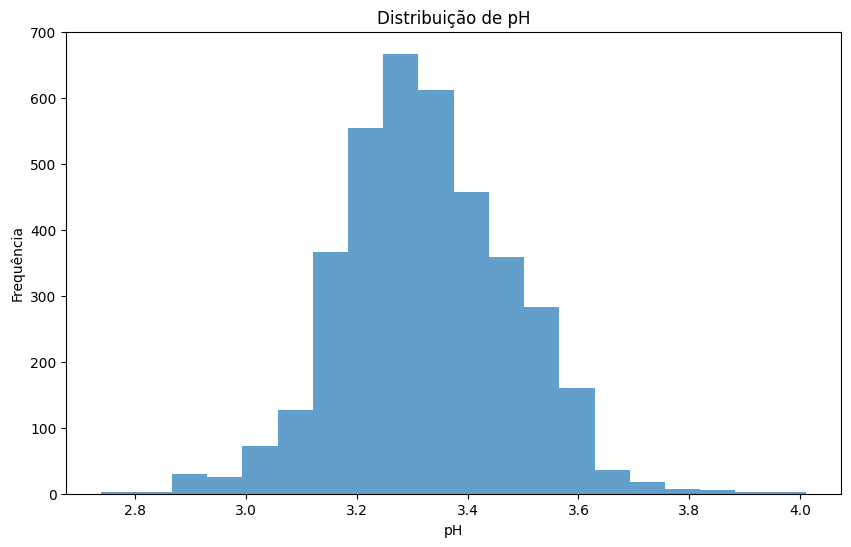

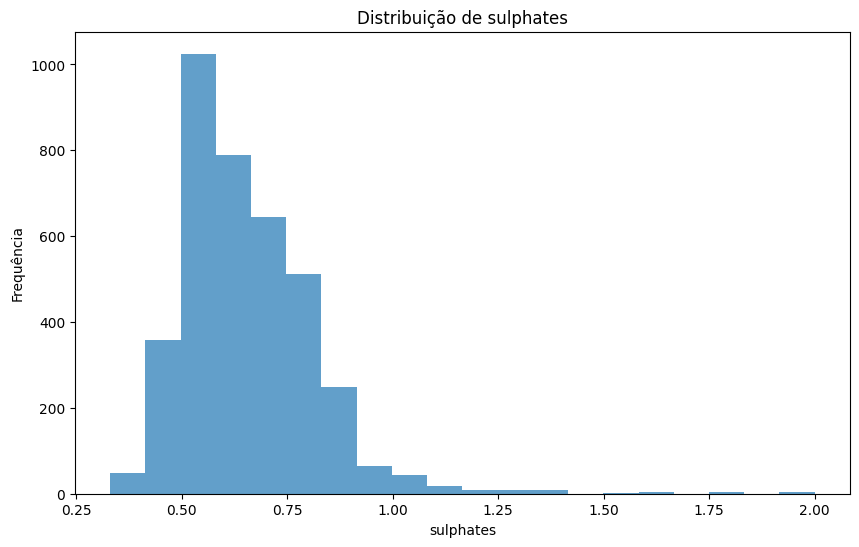

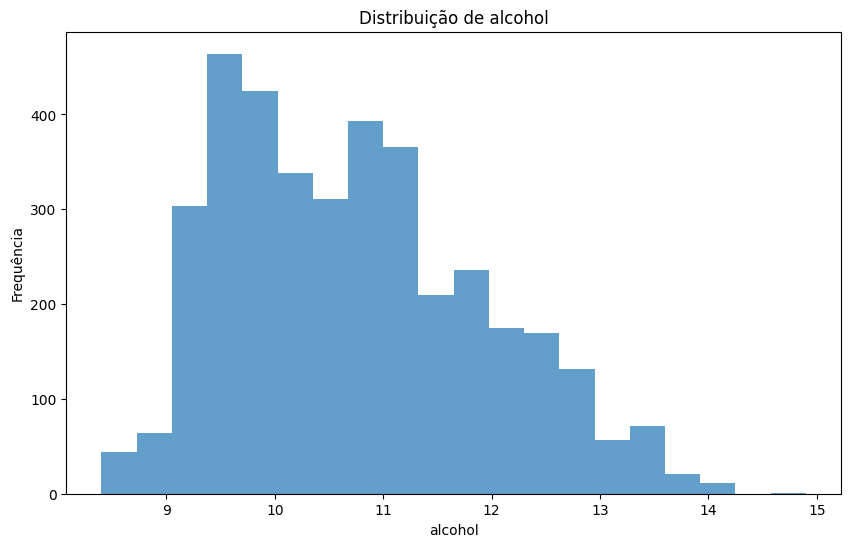

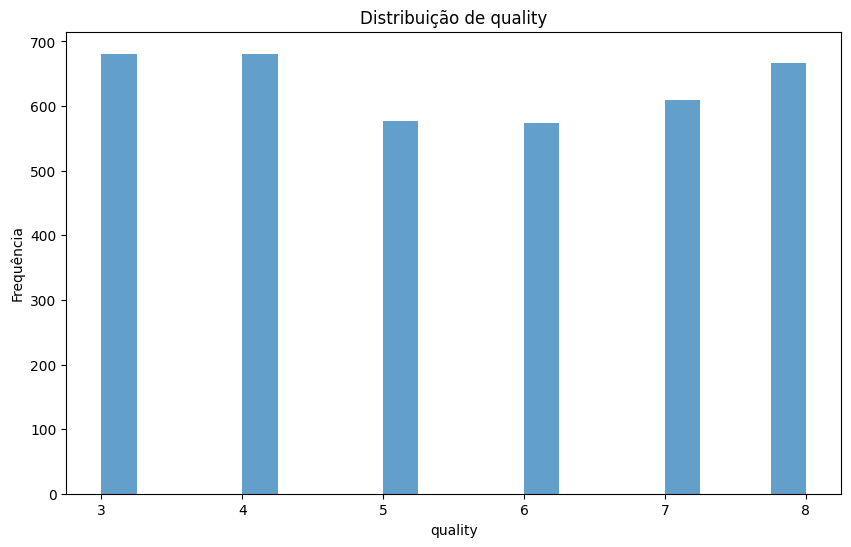

In [87]:
for col in data.columns:
    plt.hist(data[col], bins=20, alpha=0.7)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

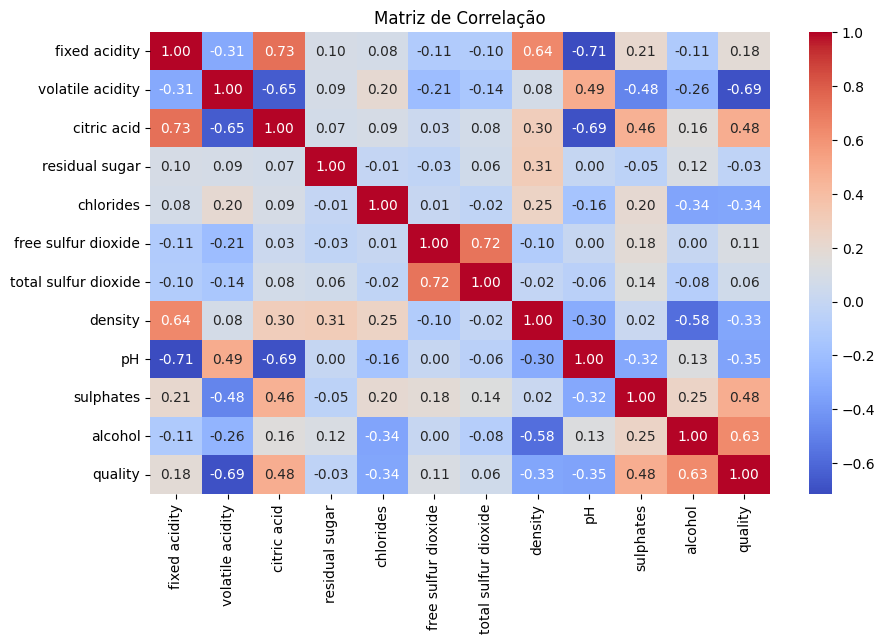

In [88]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

História dos Dados e Conclusão

Com base na análise exploratória dos dados, observamos que variáveis como 'fixed acidity', 'alcohol' e 'volatile acidity'
são altamente correlacionadas com a qualidade do vinho.

Próximos Passos:
1. Construção de modelos preditivos para estimar a qualidade do vinho com base nas variáveis.
2. Implementação de técnicas de feature engineering para melhorar a performance dos modelos.

# Entrega 2


In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
target = 'quality'
X = data.drop(columns=[target])
y = data[target]

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [93]:
print(sorted(set(y_train)))

[3, 4, 5, 6, 7, 8]


In [94]:
from sklearn.preprocessing import LabelEncoder

# Codificar as classes para valores inteiros
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [95]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Logistic Regression



In [96]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [97]:
acc_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

#Random Forest

In [98]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [99]:
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

#XGBoost

In [100]:
y_train_adjusted = y_train - 3
y_test_adjusted = y_test - 3

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_adjusted)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:31:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [101]:
acc_xgb = accuracy_score(y_test_adjusted, y_pred_xgb)
report_xgb = classification_report(y_test_adjusted, y_pred_xgb)
cm_xgb = confusion_matrix(y_test_adjusted, y_pred_xgb)

#Resultados

In [108]:
resultados = {
    'Logistic Regression': {
        'Accuracy': acc_logistic,
        'Classification Report': report_logistic,
        'Confusion Matrix': cm_logistic
    },
    'Random Forest': {
        'Accuracy': acc_rf,
        'Classification Report': report_rf,
        'Confusion Matrix': cm_rf
    },
    'XGBoost': {
        'Accuracy': acc_xgb,
        'Classification Report': report_xgb,
        'Confusion Matrix': cm_xgb
    }
}

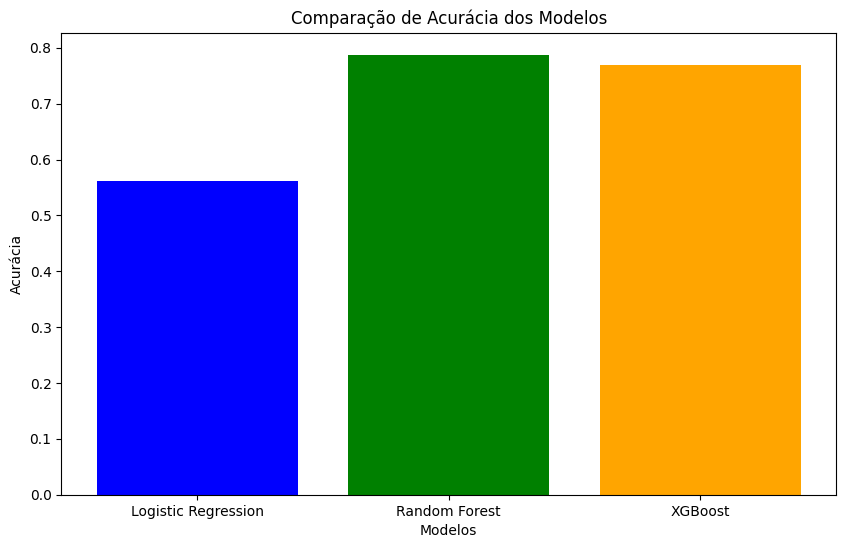

In [107]:
metrics = [resultados[model]['Accuracy'] for model in resultados]
model_names = list(resultados.keys())

plt.bar(model_names, metrics, color=['blue', 'green', 'orange'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.show()

Melhor modelo: Random Forest


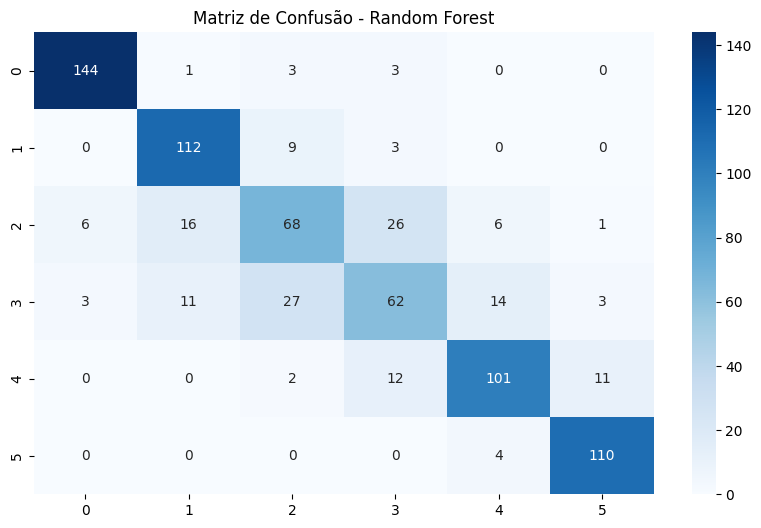

In [106]:
melhor_modelo = max(resultados, key=lambda x: resultados[x]['Accuracy'])
print(f"Melhor modelo: {melhor_modelo}")
sns.heatmap(resultados[melhor_modelo]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusão - {melhor_modelo}')
plt.show()

In [109]:
def print_results():
    for model_name, result in resultados.items():
        print(f"\nModelo: {model_name}")
        print(f"Acurácia: {result['Accuracy']:.4f}")
        print("Relatório de Classificação:")
        print(result['Classification Report'])

print_results()


Modelo: Logistic Regression
Acurácia: 0.5620
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.74      0.78      0.76       151
           4       0.51      0.64      0.57       124
           5       0.48      0.48      0.48       123
           6       0.48      0.28      0.36       120
           7       0.44      0.25      0.32       126
           8       0.58      0.91      0.71       114

    accuracy                           0.56       758
   macro avg       0.54      0.56      0.53       758
weighted avg       0.55      0.56      0.54       758


Modelo: Random Forest
Acurácia: 0.7876
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.94      0.95      0.95       151
           4       0.80      0.90      0.85       124
           5       0.62      0.55      0.59       123
           6       0.58      0.52      0.55       120
           7       0.81      0.80      0.80 

#Entrega 3

#GridSearch CV

In [127]:
import scipy as sp

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf_model = RandomForestClassifier(random_state=42)

In [145]:
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [149]:
model_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5)
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [150]:
print("Melhores parâmetros: ", model_rf.best_params_)
print("Melhor Score: ", model_rf.best_score_)

Melhores parâmetros:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor Score:  0.7790246899484018


#Random Search

In [151]:
param_dist_rf = {
    'n_estimators': np.arange(50, 200, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [152]:
model_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=100, cv=5, random_state=42)
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
185 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150])},
                   random_state=42)

In [153]:
print("Melhores parâmetros: ", model_rf.best_params_)
print("Melhor Score: ", model_rf.best_score_)

Melhores parâmetros:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Melhor Score:  0.7866132741775002


In [154]:
prediction = model_rf.predict(X_test)
print('Acurácia: ', accuracy_score(y_test, prediction))

Acurácia:  0.7902374670184696


In [155]:
cm = confusion_matrix(y_test, prediction)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[144   1   2   4   0   0]
 [  0 112  10   2   0   0]
 [  4  15  71  27   5   1]
 [  3   9  29  62  14   3]
 [  0   0   1  17 100   8]
 [  0   0   0   0   4 110]]


# Progresso do Projeto
Até o momento, realizei as três etapas:

# Primeira Etapa

## Preparação dos Dados:

Realizei a limpeza dos dados, tratando valores ausentes, possíveis outliers e realizei o balanço da categoria de qualidade do vinho.

## Análise Exploratória de Dados (EDA):

1.   Identifiquei os principais atributos que influenciam a qualidade do vinho (como acidez, álcool e pH).
2.   Visualizei as distribuições das variáveis e investiguei correlações para entender as relações entre os dados.

# Segunda Etapa

## Testes Iniciais com Algoritmos:

Apliquei algoritmos de classificação, já que a variável alvo (qualidade) é categórica.
Os modelos testados até agora incluem:
- Regressão Logística
- Random Forest
- Gradient Boosting (XGBoost)

## Seleção do Algoritmo:

Após avaliar o desempenho dos modelos, considerei os seguintes critérios:

1.   Acurácia geral
2.   Relatório de Classificação
3.   Matriz de Confusão

Com base nos testes, o Random Forest apresentou o melhor desempenho em termos de acurácia (0.7876).

## Justificativa da Escolha

Optei pelo Random Forest devido a:

*   Robustez e Estabilidade: Ele lida bem com dados desbalanceados e relações não lineares.
*   Interpretação: A importância das variáveis, como teor alcoólico e densidade.
*   Desempenho Consistente: Superou os outros algoritmos em todas as métricas-chave, com menor risco de erros.

# Terceira Etapa

Nessa etapa, realizei o GridSearchCV e RandomizedSearchCV, com isso:

- Encontrei os melhores hiperparâmetros.
- Avaliei o desempenho do modelo nos conjuntos de treino e teste.
- Analisei a matriz de confusão.

## Debate sobre resultados

## GridSearchCV

A saída do GridSearchCV indica que o melhor modelo encontrado, com os parâmetros otimizados, possui as seguintes configurações:

1. max_depth: None
2. max_features: 'sqrt'
3. min_samples_leaf: 1
4. min_samples_split: 2
5. n_estimators: 100

# Melhor Score: 0.7790

Esse é o melhor desempenho que o GridSearchCV encontrou com as combinações de parâmetros testadas, ou seja, o modelo obteve 77,90% de acurácia nos dados de validação.

## Random Search

A saída do Random Search indica que o melhor modelo encontrado, com os parâmetros otimizados, possui as seguintes configurações:

1. n_estimators: 100
2. min_samples_split: 2
3. min_samples_leaf: 1
4. max_features: 'log2'
5. max_depth: 30
6. bootstrap: False

# Melhor Score: 0.7866

Este é o melhor desempenho obtido pelo RandomizedSearchCV ao testar diferentes combinações de parâmetros. O valor do score foi obtido no conjunto de validação cruzada.

# Acurácia no Conjunto de Teste: 0.7902

A acurácia do modelo no conjunto de teste é 79,02%, o que é um desempenho bastante bom.

## Matriz de Confusão:

A matriz de confusão apresenta os seguintes valores:

[[144   1   2   4   0   0]  
 [  0 112  10   2   0   0]  
 [  4  15  71  27   5   1]  
 [  3   9  29  62  14   3]  
 [  0   0   1  17 100   8]  
 [  0   0   0   0   4 110]]

## Análise da Matriz de Confusão:

O modelo teve um bom desempenho na maioria das classes, com a maioria dos valores na diagonal que indicam previsões corretas.

## O que isso Significa:

A acurácia de 79% indica que o modelo está performando bem e é capaz de fazer previsões razoavelmente precisas.

O modelo melhorou com o RandomizedSearchCV, em comparação com o GridSearchCV, com uma pequena diferença no desempenho, alcançando 79,02% de acurácia em vez de 77,90%.

## Importância do Storytelling no Projeto

Para a apresentação executiva, será crucial criar uma narrativa clara e impactante:

- Introdução ao Problema: Explique como a qualidade do vinho impacta decisões comerciais, como precificação e posicionamento no mercado.
- Abordagem e Solução: Mostre como a análise de dados e o modelo Random Forest ajudam a prever a qualidade, apoiando decisões estratégicas.
- Resultados Visuais: Use gráficos que demonstrem a importância das variáveis e o desempenho do modelo.
- Impacto para o Negócio: Destaque os benefícios práticos, como otimização da produção e foco em atributos que realmente elevam a qualidade do produto.
